# Introduction to Artificial Intelligence: HS 2023


---

## Lab 1: Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


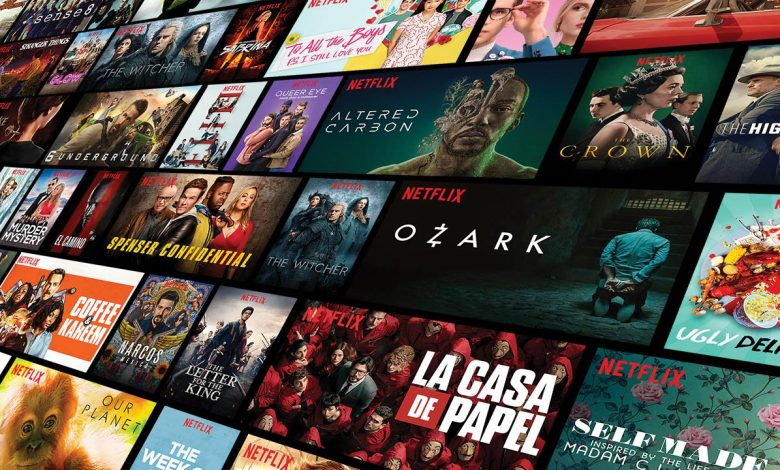

In this exercise, you are asked to complete the given notebook and solve the corresponding tasks, where you will get more practice on how to deal with data cleaning and visualisation.

### The Netflix Dataset

The Netflix dataset contains data from different movies and TV shows. It containts the following information:

- `show_id`: A unique identifier of the show.
- `type`: The type of the show, i.e. movie or tv-show.
- `title`: The title of the show.
- `director`: The director of the show.
- `cast`: The cast of the show.
- `country`: The country of origin of the show.
- `date_added`: Date on which the show was added onto Netflix.
- `release_date`:  The release date of the show.
- `release_year`:  The release year of the show.
- `rating`: The rating of the show, i.e. target public.
- `duration`: The duration of the show in terms of minutes or seasons.
- `listed_in`: Category of the show, e.g. drama, stand up comedy, etc.
- `description`: A brief description of the show.

---

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import plotly.express as px
from collections import Counter
import plotly.graph_objects as go
from wordcloud import WordCloud

## Loading  Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Data Analysis

**Dataframes:**

To better understand the data contained in the dataframe, we use a set of functions available from pandas, which are summarised as follows:

- `.head()` prints the header of a given dataframe.
- `.dtypes` describes the datatypes of all columns in the dataframe.
- `.info()` provides an overview of the different column data types and missing values in the given dataframe
- `.describe()` returns a distribution of numeric columns in the dataframe
- `.isna().sum()` provides the number of missing values per column in our DataFrame
- `.unique()` retrieves the unique values in a given dataframe column

<br>

**Visualisation:**

- `sns.displot()` plots the distribution of one column in your dataframe.

In [ ]:
# Load the netflix_db.csv file onto a dataframe named 'df_netflix'
df_netflix = pd.read_csv('./sample_data/netflix_db.csv')

In [ ]:
# Show the header of the dataframe
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Show the tail of the dataframe
df_netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
# Provide an overview of the different column data types and their missing values:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Count for every single column on the dataframe the corresponding amount of missing/empty rows
col_stats = df_netflix.isna().sum()
col_stats

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

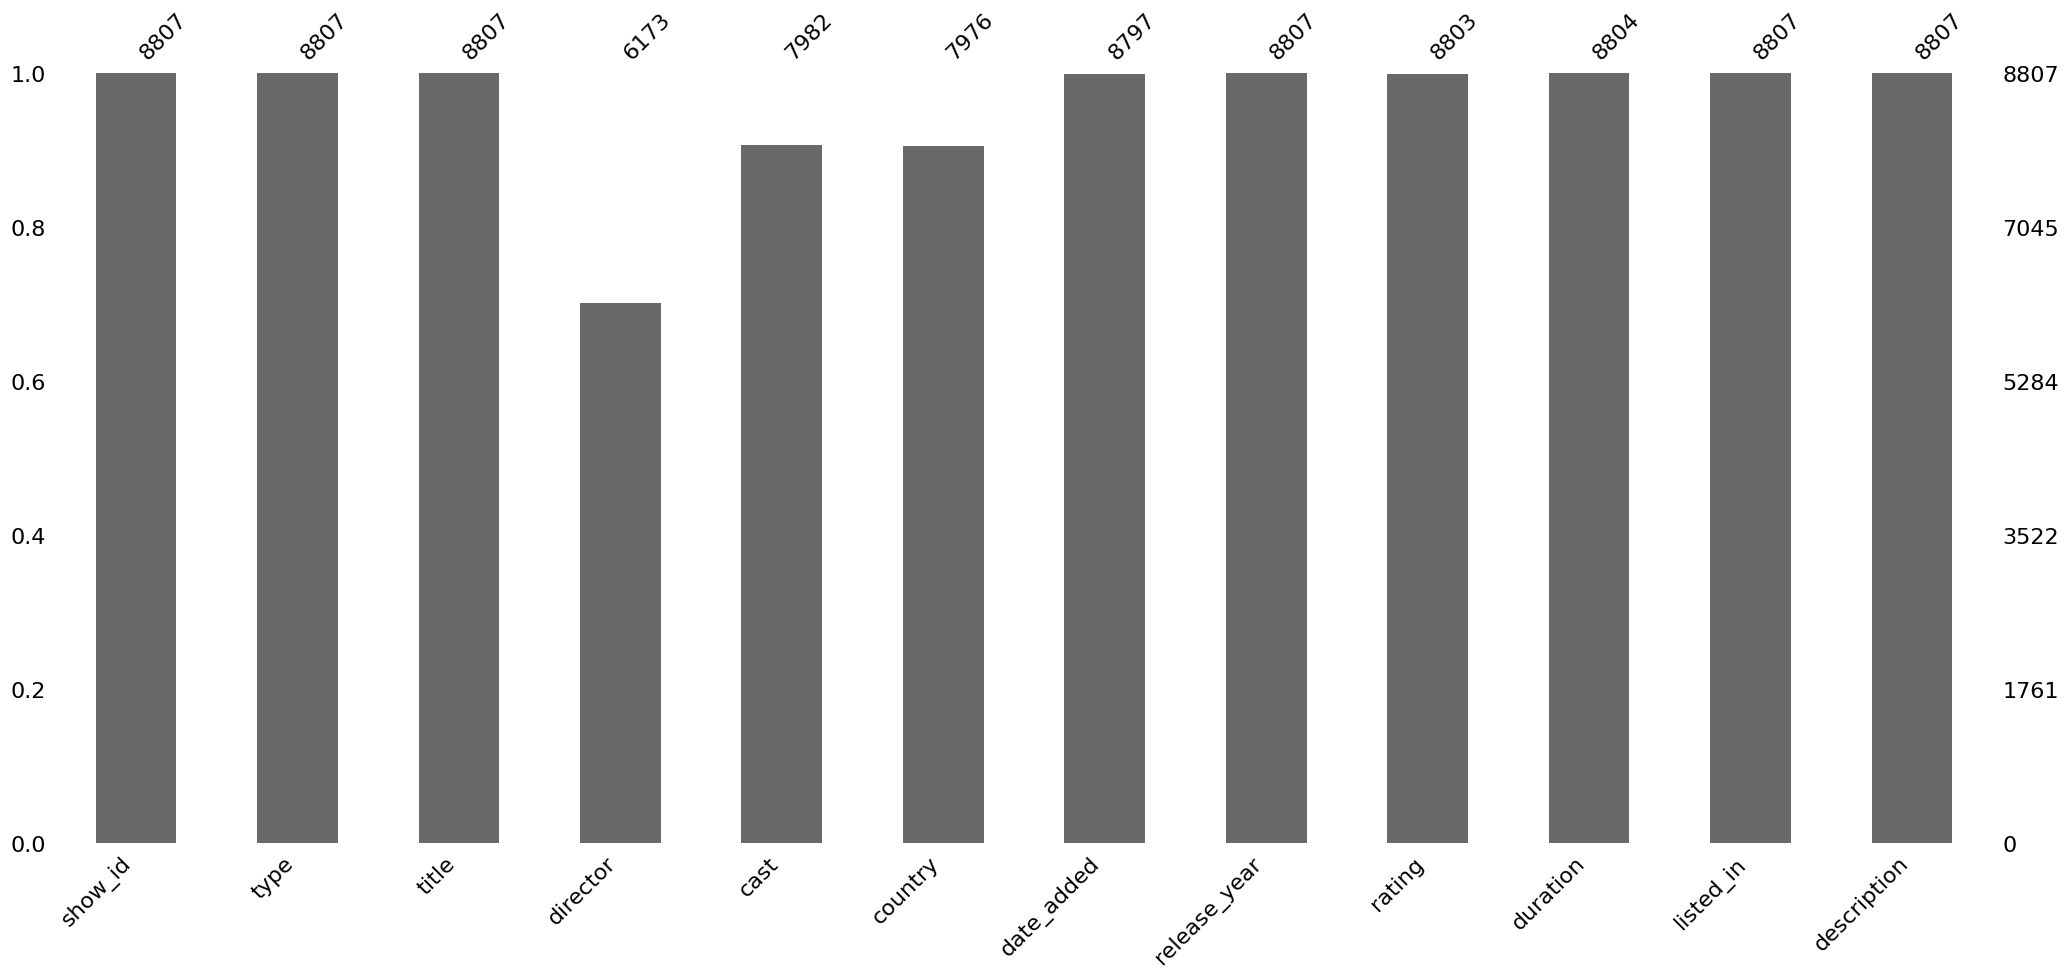

In [ ]:
# Show the same statistics on the missing values, however, use `missingno.bar()` to plot those results visually
missingno.bar(df_netflix)

In [ ]:
# There are some missing values for the columns `Cast` and `Director`. Fill the missing values with a general constant string, such as `No Data`.
df_netflix['cast'] = df_netflix['cast'] .fillna('No Data')
df_netflix['director'] = df_netflix['director'] .fillna('No Data')

In [ ]:
# Plot your dataframe
df_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,No Data,No Data,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


<Axes: >

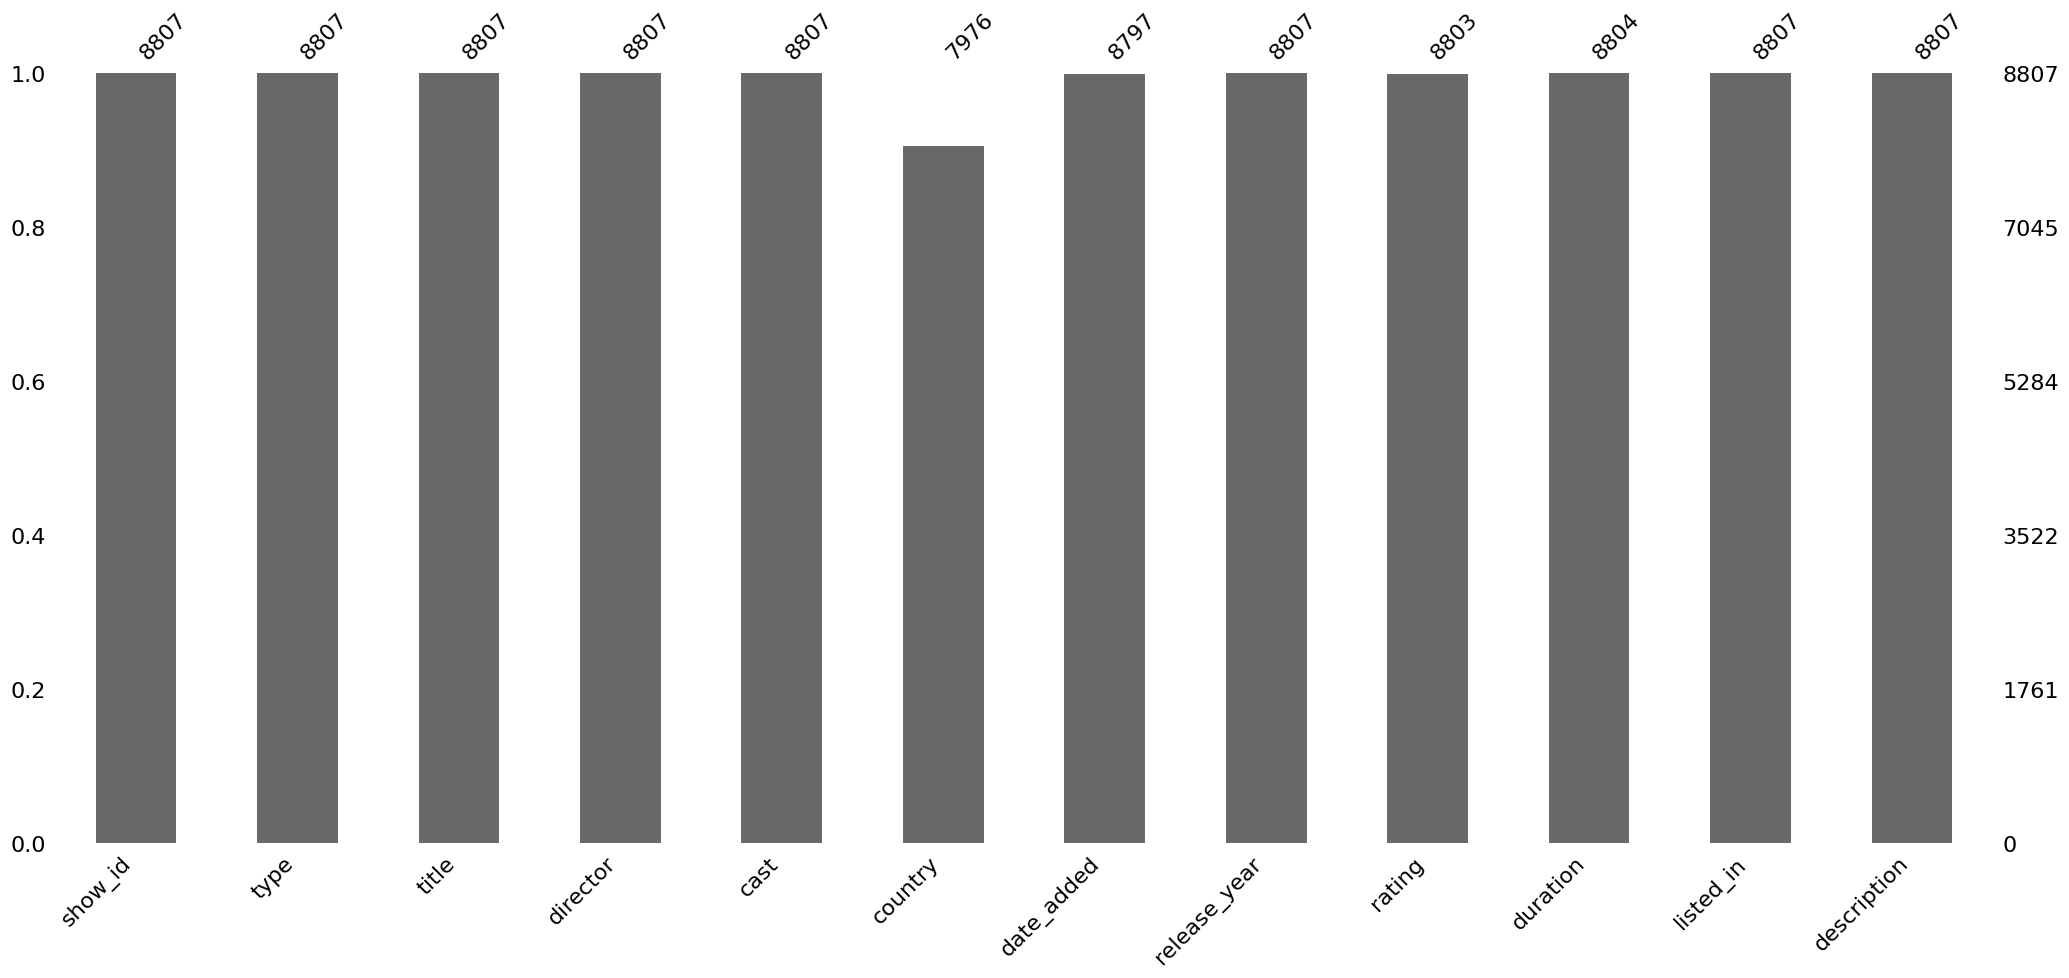

In [ ]:
# Plot again the dataframe with missingno.bar(), after having filled both `Cast`and `Director` columns
missingno.bar(df_netflix)

In [ ]:
# Count the missing rows across the different columns:
df_netflix.isna().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

In [ ]:
# One strategy to fill missing values is also to consider the mode of the given column to substitute the corresponding missing values. Compute the `mode()` on the columns with empty values and fill accordingly the missing values.
df_netflix['country'] = df_netflix['country'].fillna(df_netflix['country'].mode()[0])
df_netflix['date_added'] = df_netflix['date_added'].fillna(df_netflix['date_added'].mode()[0])
df_netflix['rating'] = df_netflix['rating'].fillna(df_netflix['rating'].mode()[0])
df_netflix['duration'] = df_netflix['duration'].fillna(df_netflix['duration'].mode()[0])

In [ ]:
# Compute for every single column, the amount/sum of missing values.
df_netflix.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# Use `dropna()` to remove empty rows(). Despite having already filled missing values, it's a good strategy to do so and get familiar with this method for future tasks.
df_netflix.dropna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,No Data,No Data,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
# Drop potential duplicated rows
df_netflix.drop_duplicates()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,No Data,No Data,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


For some upcoming tasks, you will have to create the following new columns:

* `year_added`: this column will contain the year, in which a show was added.
* `month_added`: this column will contain the year, in which a show was added as strings, e.g. `January`, etc.
* `country_main`: this will contain the main country on which a show was produced.
* `target_age`: the target age of the given show based on the already existing column `rating`, e.g. `Kids`, `Adults`.

In [ ]:
# The 'date_added' column is of type 'object'. Convert it to 'datetime' type. Then, create the additional'month_added' and 'year_added' columns
df_netflix["date_added"] = pd.to_datetime(df_netflix["date_added"])
df_netflix['month_added'] = df_netflix["date_added"].dt.month_name()
df_netflix['year_added'] = pd.DatetimeIndex(df_netflix['date_added']).year

In [ ]:
# Display the dataframe
df_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November,2019
8803,s8804,TV Show,Zombie Dumb,No Data,No Data,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",July,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January,2020


In [ ]:
# Using the 'ratings_ages' dictionary below to create a new column named 'target_age' to map the 'rating' column to the corresponding mapped value.
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df_netflix['target_age'] = df_netflix['rating'].map(ratings_ages)

In [ ]:
# Display the dataframe again and see its new results
df_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,target_age
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021,Teens
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021,Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021,Adults
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021,Adults
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November,2019,Adults
8803,s8804,TV Show,Zombie Dumb,No Data,No Data,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",July,2019,Older Kids
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November,2019,Adults
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January,2020,Older Kids


### Genre type

In [ ]:
# By using the method 'px.pie()' create a pie chart to visualise the shows by their 'type', i.e. 'TV Show' or 'Movie'.
px.pie(df_netflix, 'type')

In [ ]:
# Create a 'df_top10_genres' dataframe to display the top 10 genres with their corresponding counts.
df_top10_genres = df_netflix['listed_in'].value_counts().reset_index()
df_top10_genres.columns = ['listed_in', 'count']
df_top10_genres= df_top10_genres.iloc[:10]

In [ ]:
df_top10_genres

,listed_in,count
0,"Dramas, International Movies",362
1,Documentaries,359
2,Stand-Up Comedy,334
3,"Comedies, Dramas, International Movies",274
4,"Dramas, Independent Movies, International Movies",252
5,Kids' TV,220
6,Children & Family Movies,215
7,"Children & Family Movies, Comedies",201
8,"Documentaries, International Movies",186
9,"Dramas, International Movies, Romantic Movies",180


In [ ]:
# Using the 'px.pie()' method visualised the top 10 genres on the dataset using the dataframe that you just created
px.pie(df_top10_genres, values = 'count', hole = 0.7)

In [ ]:
# Given a 'drama' category in the 'listed_in' column, retrieve all the relevant 'swiss' shows.
df_temp = df_netflix[df_netflix['listed_in']=='Dramas, International Movies' ]
df_temp[df_netflix['country'].str.contains('Switzerland', na=False)]

<ipython-input-27-107d55e4aae3>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,target_age
285,s286,Movie,The Railway Man,Jonathan Teplitzky,"Colin Firth, Nicole Kidman, Jeremy Irvine, Ste...","Switzerland, United Kingdom, Australia",2021-08-11,2013,R,108 min,"Dramas, International Movies","Decades after World War II, a still-shattered ...",August,2021,Adults
2843,s2844,Movie,Aurora,Cristi Puiu,"Cristi Puiu, Clara Voda, Catrinel Dumitrescu, ...","Romania, France, Switzerland, Germany",2020-03-04,2010,TV-MA,186 min,"Dramas, International Movies","42-year-old Viorel, a distraught engineer, tak...",March,2020,Adults
4878,s4879,Movie,Forgive Us Our Debts,Antonio Morabito,"Marco Giallini, Claudio Santamaria, Jerzy Stuh...","Italy, Switzerland, Albania, Poland",2018-05-04,2018,TV-MA,105 min,"Dramas, International Movies","Threatened by creditors, a newly unemployed ma...",May,2018,Adults
5507,s5508,Movie,The Next Skin,"Isaki Lacuesta, Isa Campo","Àlex Monner, Emma Suárez, Sergi López, Bruno T...","Spain, Switzerland",2017-05-01,2016,TV-MA,104 min,"Dramas, International Movies","When a withdrawn, long-missing teenager reappe...",May,2017,Adults
6502,s6503,Movie,Clouds of Sils Maria,Olivier Assayas,"Juliette Binoche, Kristen Stewart, Chloë Grace...","France, Germany, Switzerland",2017-02-12,2014,R,124 min,"Dramas, International Movies",A middle-aged actress is cast in a film adapta...,February,2017,Adults


### Countries


In [ ]:
# In some shows, there is more than one country on the 'country' column. Create a new column in the dataframe named 'country_main', where you will store the first country that appears in the 'country' column.
df_netflix['country_main'] = df_netflix['country'].str.split(',').str[0]
df_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,target_age,country_main
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021,Teens,United States
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021,Adults,South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021,Adults,United States
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021,Adults,United States
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021,Adults,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November,2019,Adults,United States
8803,s8804,TV Show,Zombie Dumb,No Data,No Data,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",July,2019,Older Kids,United States
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November,2019,Adults,United States
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January,2020,Older Kids,United States


In [ ]:
# By using the new column 'country_main' create a dataframe named 'country_df', which acts as a histogram, i.e. the total amount of shows for each country is computed.
country_df = df_netflix['country_main'].value_counts().reset_index()
country_df.columns = ['country_main', 'total_amount_of_shows']
country_df

,country_main,total_amount_of_shows
0,United States,4042
1,India,1008
2,United Kingdom,628
3,Canada,271
4,Japan,259
...,...,...
81,Namibia,1
82,Senegal,1
83,Luxembourg,1
84,Syria,1


In [ ]:
# Use the 'px.pie()' method to plot the computed dataframe as a pie. As you will see, USA is the country with the largest amount of shows, followed by India and the UK.

px.pie(country_df.iloc[:15],names = 'country_main', values='total_amount_of_shows', title='Distribution of Shows by Country')

### Geographical Results


In [ ]:
# Create a dataframe named 'df_year_counts' which has three columns, which counts for each year and corresponding country how many shows were produced for that combination
df_year_counts = df_netflix.groupby(['release_year', 'country_main']).size().reset_index(name='Number_of_Shows')
df_year_counts

,release_year,country_main,Number_of_Shows
0,1925,United States,1
1,1942,United States,2
2,1943,United States,3
3,1944,United States,3
4,1945,United States,4
...,...,...,...
844,2021,United Arab Emirates,2
845,2021,United Kingdom,27
846,2021,United States,362
847,2021,Uruguay,1


In [ ]:
# Use the method 'px.choropleth()' to create a temporal visualisation map of the amount of shows per country and per year. As a resuls you will have an animation with corresponding colorcded colormap on the amount of movies.
# Note that the method 'px.choropleth()' has a parameter called 'locations' that you can use to match the country names and locations.

# Load the geospatial data
geospatial_data = pd.read_csv('./sample_data/california_housing_test.csv')

# Create a choropleth map
fig = px.choropleth(
    df_year_counts,
    locations='country_main',  # Match the country names in 'df_year_counts'
    locationmode='country names',  # Set the location mode to match country names
    color='Number_of_Shows',  # Color the map based on the 'Number_of_Shows' column
    hover_name='country_main',  # Display country names when hovering over the map
    animation_frame='release_year',  # Use 'release_year' for the animation
    projection='natural earth'  # Set the projection
)

# Show the map
fig.show()

### Categories

In [ ]:
# Create a figure that displays the number of TV-shows or Movies over time as separated curves. You can refer to 'go.Scatter()' for generating such a Figure.
# Note that this library has been imported 'plotly.graph_objects as go'.

df_year_type_counts = df_netflix.groupby(['release_year', 'type']).size().reset_index(name='Number_of_Shows')

# Create separate traces for TV shows and Movies
tv_shows_trace = go.Scatter(
    x=df_year_type_counts[df_year_type_counts['type'] == 'TV Show']['release_year'],
    y=df_year_type_counts[df_year_type_counts['type'] == 'TV Show']['Number_of_Shows'],
    mode='lines',
    name='TV Shows'
)

movies_trace = go.Scatter(
    x=df_year_type_counts[df_year_type_counts['type'] == 'Movie']['release_year'],
    y=df_year_type_counts[df_year_type_counts['type'] == 'Movie']['Number_of_Shows'],
    mode='lines',
    name='Movies'
)

fig = go.Figure(data=[tv_shows_trace, movies_trace])

# Add labels and title
fig.update_layout(
    xaxis_title='Release Year',
    yaxis_title='Number of Shows',
    title='Number of TV Shows and Movies Over Time'
)

# Show the figure
fig.show()

### Directors

In [ ]:
# Create a dataframe that groups directors and show types. It computes how many movies/tv-shows that a given director has produced.
df_selected_director = df_netflix.groupby(["director", "type"]).size().reset_index(name="count")
df_selected_director

,director,type,count
0,A. L. Vijay,Movie,2
1,A. Raajdheep,Movie,1
2,A. Salaam,Movie,1
3,A.R. Murugadoss,Movie,2
4,Aadish Keluskar,Movie,1
...,...,...,...
4571,Çagan Irmak,Movie,1
4572,Ísold Uggadóttir,Movie,1
4573,Óskar Thór Axelsson,Movie,1
4574,Ömer Faruk Sorak,Movie,2


In [ ]:
# As you might have realised, the previous dataframe wa not sorted. Now, sort the dataframe based on the counts.
df_selected_director = df_selected_director.sort_values(by="count", ascending=False)
df_selected_director

,director,type,count
3428,Rajiv Chilaka,Movie,19
3479,"Raúl Campos, Jan Suter",Movie,18
4087,Suhas Kadav,Movie,16
2622,Marcus Raboy,Movie,15
1803,Jay Karas,Movie,14
...,...,...,...
2050,Jonathan Sobol,Movie,1
2051,Jonathan Taylor,Movie,1
2052,Jonathan Teplitzky,Movie,1
2053,Jonathon Link,Movie,1


In [ ]:
# Create a dataframe named 'df_director' that shows the top 10 directors based on the amount of shows produced, use the previous dataframe 'df_selected_director'.
df_director = df_selected_director.head(10)
df_director

,director,type,count
3428,Rajiv Chilaka,Movie,19
3479,"Raúl Campos, Jan Suter",Movie,18
4087,Suhas Kadav,Movie,16
2622,Marcus Raboy,Movie,15
1803,Jay Karas,Movie,14
690,Cathy Garcia-Molina,Movie,13
1800,Jay Chapman,Movie,12
4527,Youssef Chahine,Movie,12
2697,Martin Scorsese,Movie,12
4061,Steven Spielberg,Movie,11


In [ ]:
# As you might have realised the previous dataframe the top-perfoming director is empty, i.e. 'No Data'. Remove all the occurrences of 'No Data'.
df_director_10 = df_director[df_director["director"] != "No data"]
df_director_10

,director,type,count
3428,Rajiv Chilaka,Movie,19
3479,"Raúl Campos, Jan Suter",Movie,18
4087,Suhas Kadav,Movie,16
2622,Marcus Raboy,Movie,15
1803,Jay Karas,Movie,14
690,Cathy Garcia-Molina,Movie,13
1800,Jay Chapman,Movie,12
4527,Youssef Chahine,Movie,12
2697,Martin Scorsese,Movie,12
4061,Steven Spielberg,Movie,11


Text(0.5, 1.0, 'Top 10 Directors ')

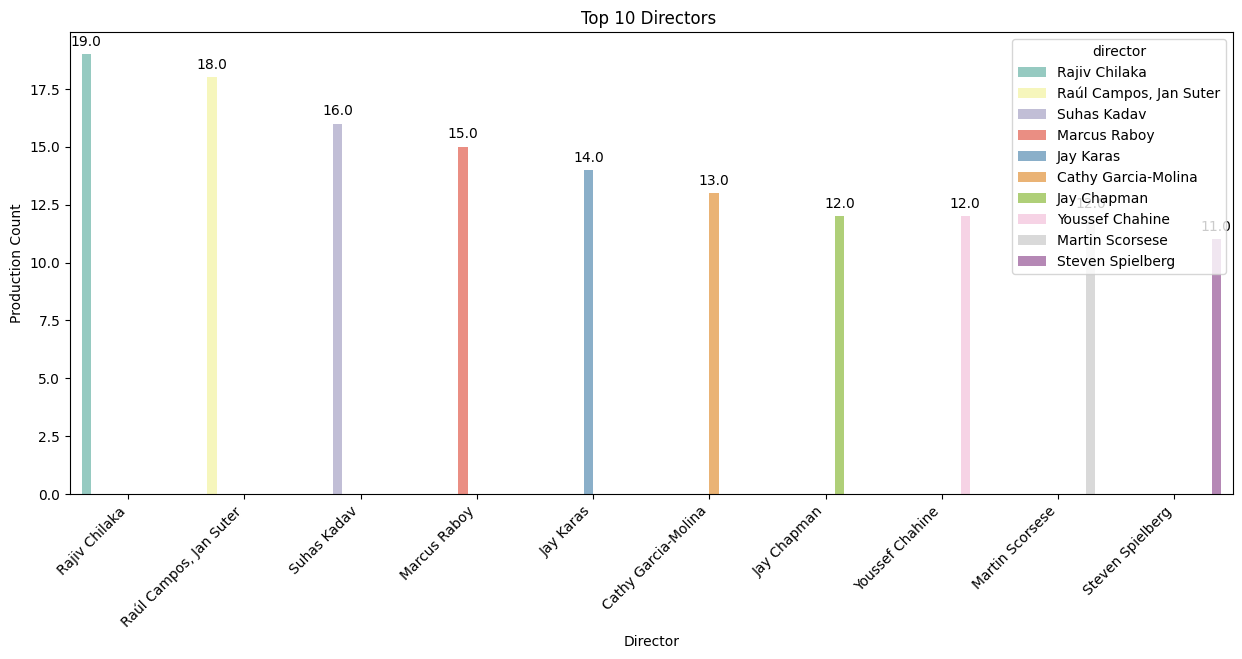

In [ ]:
# Using sns.barplot() display the directors as bars. For each different bar, also show the corresponding counts as numbers on top of each bar.
plt.figure(figsize=(15,6))
bar_width=7.7
ax = sns.barplot(df_director_10, x= "director", y= "count", hue = "director", palette="Set3")
for p in ax.patches:
    ax.annotate(f"{p.get_height()}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 9),
                textcoords='offset points')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right")
ax.set_xlabel("Director")
ax.set_ylabel("Production Count")
plt.title("Top 10 Directors ")

In [ ]:
# Display all the shows() of your favorite director.
# The retrieved rows shall contain the director name, the title of the show, type of the show, release year, and listed_in category.
favorite_director = "Martin Scorsese"

favorite_director_work = df_netflix[df_netflix["director"].str.contains(favorite_director, case=False, na=False)]

desired_info = ["director", "title", "type", "release_year", "listed_in"]

info = favorite_director_work[desired_info]
info

,director,title,type,release_year,listed_in
1358,Martin Scorsese,Shutter Island,Movie,2010,Thrillers
2632,Martin Scorsese,No Direction Home: Bob Dylan,Movie,2005,"Documentaries, Music & Musicals"
2860,Martin Scorsese,Hugo,Movie,2011,"Children & Family Movies, Dramas"
3227,Martin Scorsese,The Irishman,Movie,2019,Dramas
3759,Martin Scorsese,Rolling Thunder Revue: A Bob Dylan Story by Ma...,Movie,2019,"Documentaries, Music & Musicals"
6111,Martin Scorsese,Alice Doesn't Live Here Anymore,Movie,1974,"Classic Movies, Comedies, Dramas"
6826,Martin Scorsese,Gangs of New York,Movie,2002,Dramas
6880,Martin Scorsese,GoodFellas,Movie,1990,"Classic Movies, Dramas"
7431,Martin Scorsese,Mean Streets,Movie,1973,"Classic Movies, Dramas, Independent Movies"
7820,Martin Scorsese,Raging Bull,Movie,1980,"Classic Movies, Dramas, Sports Movies"


### Word Clouds

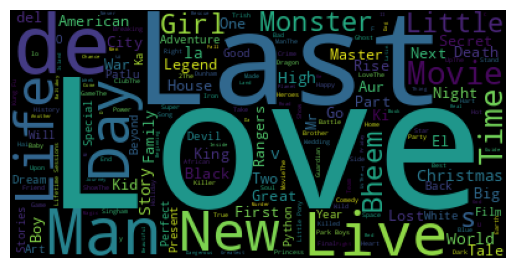

In [ ]:
# Using the WordCloud() method display the most frequent words in the shows 'titles'.
title = ''.join(df_netflix['title'])
wordcloud = WordCloud().generate(title)
plt.clf()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

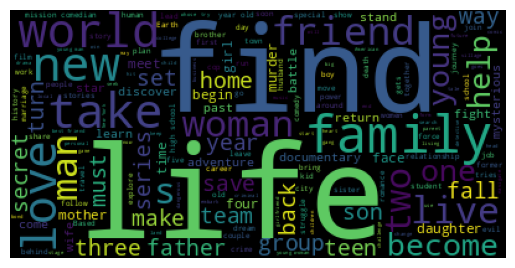

In [ ]:
# Using the WordCloud() method display the most frequent words in the shows 'description'.
description = ''.join(df_netflix['description'])
wordcloud = WordCloud().generate(description)
plt.clf()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Conclusions:

Please summarize your main findings by discussing any interesting insights, patterns, or trends you discovered. Reflect on the significance of your results and their potential implications.

You can summarize your outcomes as bullet points. Ideally, you should provide examples/observations that can be used to support each of your statements.



1.   It was interesting to find out that there are more movies than tv shows, I thought it was the other way around.
2.   I found the wide spread of movie prodction to be intresting as well as it reached parts of Africa like Nigeria.
3. Generally I am impressed with the power python has to compute large amounts of data and display it in graphs and pictures.
4. It was quite interesting to see the words that appear in a show's title and description.
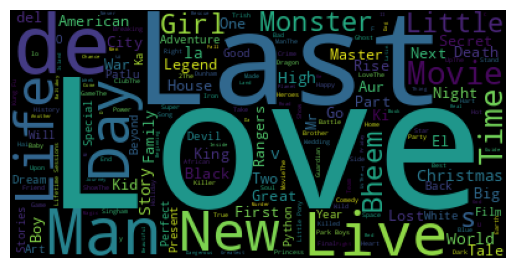

